In [14]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from config import (api_key, gkey)
from pprint import pprint
from datetime import datetime
from citipy import citipy


In [4]:
# generate a datafrome with >500 pairs unique (non-repeat) latitude and longitude using numpy function random.uniform
#range of latitude : -90 to 90, longitude: -180 to 180
np.random.seed(34578862)
size=1500
coordinates_df=pd.DataFrame({"Lng":(np.random.uniform(-1.8,1.8,size)*100), "Lat":(np.random.uniform(-0.9,0.9,size)*100)})

coordinates_df["City"]=""
coordinates_df["Country"]=""
coordinates_df.head()


,Lng,Lat,City,Country
0,-101.240633,-79.449328,,
1,77.095977,22.609455,,
2,-83.838386,3.556622,,
3,64.878716,-20.189516,,
4,146.317700,2.971064,,


In [5]:
# retrieve city and country name using citipy module
for i in range(0,len(coordinates_df["Lat"])):
    city=citipy.nearest_city(coordinates_df.iloc[i]["Lat"],coordinates_df.iloc[i]["Lng"])
   
    coordinates_df.loc[i,["City"]]=city.city_name
    coordinates_df.loc[i,["Country"]]=city.country_code
    #coordinates_df.iloc[i][2]=city.city_name
    #coordinates_df.iloc[i][3]=city.country_code


#find out how many unique city in coordinates_df datafrome, if <500 then increae size of random pairs of Lat,Lng, here 1000-->1200
coordinates_df.groupby(["City"]).nunique()
coordinates_df.head() 


,Lng,Lat,City,Country
0,-101.240633,-79.449328,punta arenas,cl
1,77.095977,22.609455,khategaon,in
2,-83.838386,3.556622,burica,pa
3,64.878716,-20.189516,grand river south east,mu
4,146.317700,2.971064,lorengau,pg


In [19]:
# drop duplicated cities in coordinates_df dataframe 
#and define new columns in the dataframe for temp,cloudness, wind speed and humidity
cities_df=coordinates_df.drop_duplicates("City",keep="first")
cities_df.loc[0,"Max Temp (F)"]=""
cities_df.loc[0,"Humidity (%)"]=""
cities_df.loc[0,"Cloudiness (%)"]=""
cities_df.loc[0,"Wind Speed (m/s)"]=""

cities_df.head()


,Lng,Lat,City,Country,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s)
0,-101.240633,-79.449328,punta arenas,cl,,,,
1,77.095977,22.609455,khategaon,in,NaN,NaN,NaN,NaN
2,-83.838386,3.556622,burica,pa,NaN,NaN,NaN,NaN
3,64.878716,-20.189516,grand river south east,mu,NaN,NaN,NaN,NaN
4,146.317700,2.971064,lorengau,pg,NaN,NaN,NaN,NaN


In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each

with open("output_data/cities_retrieve.log", 'w') as f:
    for j in range(0,len(cities_df.City)):
        quary_url=query_url + cities_df.iloc[j,2]+','+cities_df.iloc[j,3]
        response = requests.get(quary_url).json()
   
        try:
        
            cities_df.iloc[j,4]=response["main"]["temp_max"]
            cities_df.iloc[j,5]=response["main"]["humidity"]
            cities_df.iloc[j,6]=response["clouds"]["all"]
            cities_df.iloc[j,7]=response["wind"]["speed"]
            print(f" City: {cities_df.iloc[j,2]} City ID: {response['id']} been processed.", file = f)
        
        
        except KeyError:
            print(f" City {cities_df.iloc[j,2]} {cities_df.iloc[j,3]} : weather data not found", file = f)
   

    
    
    

In [21]:
#convert string datatype to numeric for the following columns
cities_df["Max Temp (F)"]=pd.to_numeric(cities_df["Max Temp (F)"],errors='coerce')
cities_df["Humidity (%)"]=pd.to_numeric(cities_df["Humidity (%)"],errors='coerce')
cities_df["Cloudiness (%)"]=pd.to_numeric(cities_df["Cloudiness (%)"],errors='coerce')
cities_df["Wind Speed (m/s)"]=pd.to_numeric(cities_df["Wind Speed (m/s)"],errors='coerce')
print(cities_df.dtypes)
cities_df.head() 

Lng                 float64
Lat                 float64
City                 object
Country              object
Max Temp (F)        float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (m/s)    float64
dtype: object


/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Lng,Lat,City,Country,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s)
0,-101.240633,-79.449328,punta arenas,cl,51.80,81.0,40.0,10.29
1,77.095977,22.609455,khategaon,in,75.13,29.0,45.0,4.70
2,-83.838386,3.556622,burica,pa,NaN,NaN,NaN,NaN
3,64.878716,-20.189516,grand river south east,mu,NaN,NaN,NaN,NaN
4,146.317700,2.971064,lorengau,pg,84.52,70.0,100.0,7.58


In [22]:
# convert wind speed unit m/s to MPH
cities_df["Wind Speed (mph)"]=cities_df["Wind Speed (m/s)"]*2.23694
cities_df.describe()
cities_df.dropna()

cities_df.to_csv("output_data/retrieved_city_data.csv")

#get current date 
dateTimeObj = datetime.now()
dateStr = dateTimeObj.strftime("%d %b %Y ")


/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


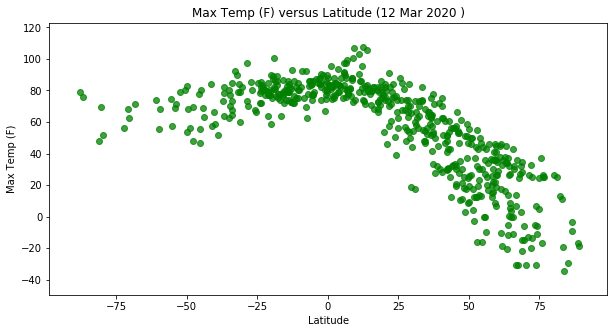

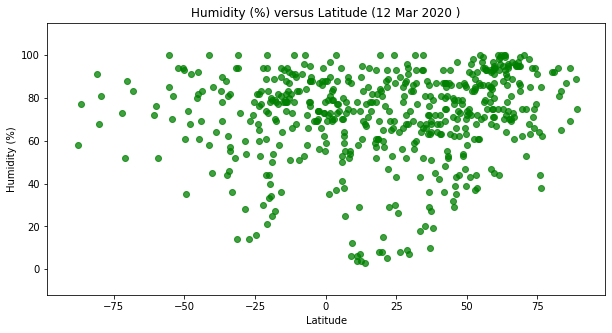

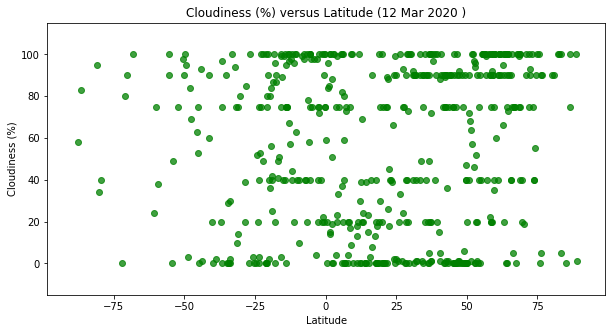

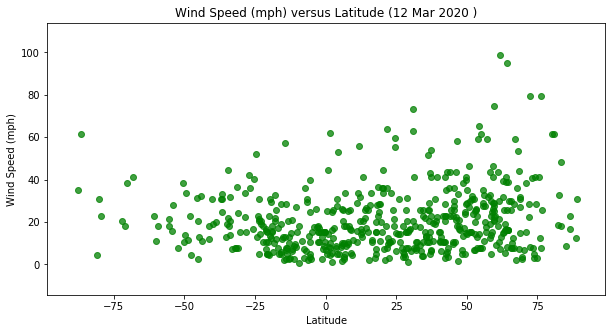

In [23]:
#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["Max Temp (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]

for var in var_list:
    
    fig1 =plt.figure(figsize=(10, 5))
    plt.scatter(cities_df["Lat"],cities_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
    plt.ylabel(var)
    plt.xlabel('Latitude')
    plt.ylim(min(cities_df[var])-15, max(cities_df[var])+15)
    plt.xlim(min(cities_df["Lat"])-10, max(cities_df["Lat"])+10)
    plt.title(f"{var} versus Latitude ({dateStr})")
    
    fig1.savefig(f"{var}")
    

1. the first scatter plot: for datapoints with latitue <0, there is a positive correlation between Max Temperature and Latitude, both of them move the same direction; for datapoints with latitude>0,there is a neagtive correlation between Max Temperature and Latitude.
2. the second scatter plot: there  maybe very weak positive relationship between Humidity and Latitude 
3. the third scatter plot: there is no apparent relationship between Cloudness and Latitude 
4. the fourth scatter plot: there is no apparent relationship between Wind speed and Latitude 




In [ ]:
#create dataframe for Northern Hemisphere
North_df=cities_df.loc[cities_df["Lat"]>=0]

#reate dataframe for Southern Hemisphere
South_df=cities_df.loc[cities_df["Lat"]<0]

In [25]:
# define two functions, one for linear regression and one for setup scatter plot with linear regresion line 
def regr(x,y,NS,var):
    
    #mask the values in both x and y for where there is a NaN in Y
    x_values = np.ma.masked_array(x,mask=np.isnan(y)).compressed()
    y_values = np.ma.masked_array(y,mask=np.isnan(y)).compressed()
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f" The r value for {NS} {var}: {round(rvalue,2)}")
    return [x_values,y_values,regress_values,line_eq]

def nsplot(a,NS,var,ax):
    
    ax.scatter(a[0],a[1],marker="o", facecolors="green",   edgecolors="green", alpha=0.75)
    ax.plot(a[0],a[2],"r-")
    fig.suptitle(f"{var} vs Latitude")
    if NS=="North":
        ax.annotate(""+a[3],(-5,-15),fontsize=15,color="red")
        ax.set_ylabel(var)
        ax.set_xlabel('Latitude')
        ax.set_ylim(min(a[1])-25, max(a[1])+15)
        ax.set_xlim(min(a[0])-10, max(a[0])+10)
        ax.set_title(f"{NS}ern Hemisphere       ")
        
    else:
        ax.annotate(""+a[3],(-60,max(a[1])+5),fontsize=15,color="red")  
        ax.set_ylabel(var)
        ax.set_xlabel('Latitude')
        ax.set_ylim(min(a[1])-25, max(a[1])+15)
        ax.set_xlim(min(a[0])-10, max(a[0])+10)
        ax.set_title(f"{NS}ern Hemisphere ")
        
    




 The r value for North Max Temp (F): -0.86
 The r value for South Max Temp (F): 0.52
 The r value for North Humidity (%): 0.28
 The r value for South Humidity (%): 0.04
 The r value for North Cloudiness (%): 0.29
 The r value for South Cloudiness (%): 0.1
 The r value for North Wind Speed (mph): 0.2
 The r value for South Wind Speed (mph): -0.34


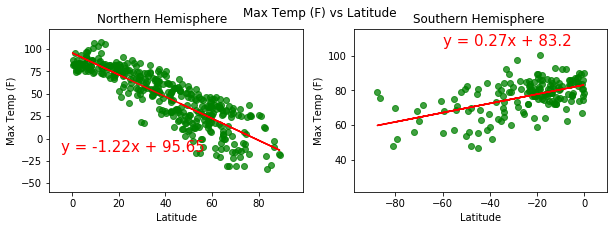

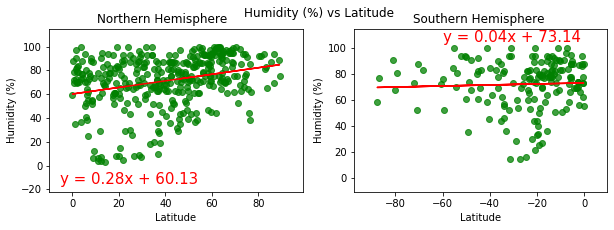

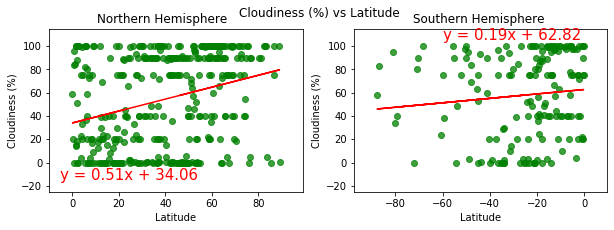

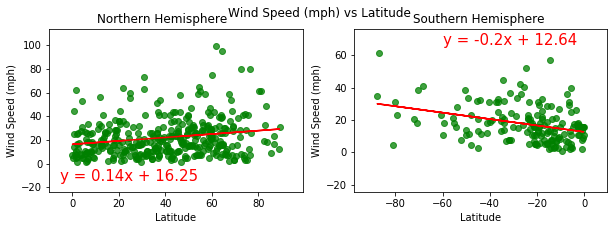

In [26]:
# loop through list to generate scatter plots and regression lines for 
#["Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"] in Northern and southern Hemisphere
var_list=["Max Temp (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]

for var in var_list:

    para1=regr( North_df["Lat"],North_df[var],"North",var)
    para2=regr( South_df["Lat"],South_df[var],"South",var)
   
    fig = plt.figure(figsize=(10,3)) 
    
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)
    nsplot(para1,"North",var,ax1)

    nsplot(para2,"South",var,ax2)
    
    fig.savefig(f"output_data/{var}_Hemisphere")